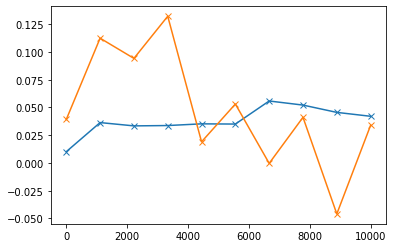

In [13]:
import pyabc
from study_abc_noise.model import HodgkinHuxleyModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
import pickle
%matplotlib inline

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

n_t = 10
mv = ModelVars(n_t=n_t, basedir="..")

# model
model = mv.get_model()
model_noisy = mv.get_model_noisy()

prior = mv.get_prior()
distance = mv.get_distance()
kernel = mv.get_kernel()
acceptor = pyabc.StochasticAcceptor()
eps = pyabc.Temperature()

# data
def get_data():
    try:
        data_nonoise, data = pickle.load(open(f"data_{n_t}.dat", 'rb'))
    except:
        data_nonoise = model(mv.p_true)
        data = mv.add_noise_to_data(data_nonoise)
        pickle.dump((data_nonoise, data), open(f"data_{n_t}.dat", 'wb'))
    return data_nonoise, data

data_nonoise, data = get_data()

plt.plot(data_nonoise['K'], 'x-')
plt.plot(data['K'], 'x-')

In [ ]:
abc = pyabc.ABCSMC(model, prior, distance)
abc.new("sqlite:///h_incorrect.db", data)
abc.run(max_nr_populations=15)

In [12]:
abc = pyabc.ABCSMC(model, prior, kernel, eps=temperature, acceptor=acceptor)
abc.new("sqlite:///h_stochastic_acceptor.db", data)
abc.run()

INFO:History:Start <ABCSMC(id=2, start_time=2019-11-21 20:17:33.359967, end_time=None)>


ValueError: operands could not be broadcast together with shapes (10,) (100,) 